In [1]:
import os
from data_provider.data_split_recorder import split_recorder
import matplotlib.pyplot as plt
import pickle as pkl
import pandas as pd
import numpy as np
import random
import json
seed = 42
np.random.seed(seed)
random.seed(seed)

In [2]:
stanford_map = {
            'Stanford_Nova_Regular_100': 1.0,
            'Stanford_Nova_Regular_101': 2.0,
            'Stanford_Nova_Regular_102': 3.0,
            'Stanford_Nova_Regular_191': 4.0,
            'Stanford_Nova_Regular_192': 5.0,
            'Stanford_Nova_Regular_193': 6.0,
            'Stanford_Nova_Regular_194': 7.0,
            'Stanford_Nova_Regular_195': 8.0,
            'Stanford_Nova_Regular_196': 9.0,
            'Stanford_Nova_Regular_198': 10.0,
            'Stanford_Nova_Regular_199': 11.0,
            'Stanford_Nova_Regular_200': 12.0,
            'Stanford_Nova_Regular_201': 13.0,
            'Stanford_Nova_Regular_202': 14.0,
            'Stanford_Nova_Regular_203': 15.0,
            'Stanford_Nova_Regular_204': 16.0,
            'Stanford_Nova_Regular_205': 17.0,
            'Stanford_Nova_Regular_206': 18.0,
            'Stanford_Nova_Regular_207': 19.0,
            'Stanford_Nova_Regular_208': 20.0,
            'Stanford_Nova_Regular_209': 21.0,
            'Stanford_Nova_Regular_210': 22.0,
            'Stanford_Nova_Regular_211': 23.0,
            'Stanford_Nova_Regular_212': 24.0,
            'Stanford_Nova_Regular_213': 25.0,
            'Stanford_Nova_Regular_214': 26.0,
            'Stanford_Nova_Regular_215': 27.0,
            'Stanford_Nova_Regular_216': 28.0,
            'Stanford_Nova_Regular_217': 29.0,
            'Stanford_Nova_Regular_219': 30.0,
            'Stanford_Nova_Regular_220': 31.0,
            'Stanford_Nova_Regular_221': 32.0,
            'Stanford_Nova_Regular_222': 33.0,
            'Stanford_Nova_Regular_223': 34.0,
            'Stanford_Nova_Regular_224': 35.0,
            'Stanford_Nova_Regular_225': 36.0,
            'Stanford_Nova_Regular_226': 37.0,
            'Stanford_Nova_Regular_227': 38.0,
            'Stanford_Nova_Regular_228': 39.0,
            'Stanford_Nova_Regular_229': 40.0,
            'Stanford_Nova_Regular_230': 181.0,
            'Stanford_Nova_Regular_269': 41.0,
            'Stanford_Nova_Regular_270': 42.0,
            'Stanford_Nova_Regular_271': 43.0,
            'Stanford_Nova_Regular_272': 44.0,
            'Stanford_Nova_Regular_273': 45.0,
            'Stanford_Nova_Regular_274': 46.0,
            'Stanford_Nova_Regular_275': 47.0,
            'Stanford_Nova_Regular_276': 48.0,
            'Stanford_Nova_Regular_277': 49.0,
            'Stanford_Nova_Regular_278': 50.0,
            'Stanford_Nova_Regular_279': 51.0,
            'Stanford_Nova_Regular_280': 52.0,
            'Stanford_Nova_Regular_281': 53.0,
            'Stanford_Nova_Regular_282': 54.0,
            'Stanford_Nova_Regular_283': 55.0,
            'Stanford_Nova_Regular_284': 56.0,
            'Stanford_Nova_Regular_285': 57.0,
            'Stanford_Nova_Regular_286': 58.0,
            'Stanford_Nova_Regular_287': 59.0,
            'Stanford_Nova_Regular_288': 60.0,
            'Stanford_Nova_Regular_289': 61.0,
            'Stanford_Nova_Regular_290': 62.0,
            'Stanford_Nova_Regular_291': 63.0,
            'Stanford_Nova_Regular_292': 64.0,
            'Stanford_Nova_Regular_293': 65.0,
            'Stanford_Nova_Regular_294': 66.0,
            'Stanford_Nova_Regular_295': 67.0,
            'Stanford_Nova_Regular_296': 68.0,
            'Stanford_Nova_Regular_297': 69.0,
            'Stanford_Nova_Regular_299': 70.0,
            'Stanford_Nova_Regular_300': 71.0,
            'Stanford_Nova_Regular_301': 72.0,
            'Stanford_Nova_Regular_302': 73.0,
            'Stanford_Nova_Regular_303': 74.0,
            'Stanford_Nova_Regular_304': 75.0,
            'Stanford_Nova_Regular_305': 76.0,
            'Stanford_Nova_Regular_306': 77.0,
            'Stanford_Nova_Regular_307': 78.0,
            'Stanford_Nova_Regular_308': 79.0,
            'Stanford_Nova_Regular_309': 80.0,
            'Stanford_Nova_Regular_310': 81.0,
            'Stanford_Nova_Regular_311': 82.0,
            'Stanford_Nova_Regular_312': 83.0,
            'Stanford_Nova_Regular_313': 84.0,
            'Stanford_Nova_Regular_314': 85.0,
            'Stanford_Nova_Regular_315': 86.0,
            'Stanford_Nova_Regular_316': 87.0,
            'Stanford_Nova_Regular_317': 88.0,
            'Stanford_Nova_Regular_318': 89.0,
            'Stanford_Nova_Regular_319': 90.0,
            'Stanford_Nova_Regular_320': 91.0,
            'Stanford_Nova_Regular_321': 92.0,
            'Stanford_Nova_Regular_322': 93.0,
            'Stanford_Nova_Regular_323': 94.0,
            'Stanford_Nova_Regular_324': 95.0,
            'Stanford_Nova_Regular_325': 96.0,
            'Stanford_Nova_Regular_326': 97.0,
            'Stanford_Nova_Regular_103': 98.0,
            'Stanford_Nova_Regular_104': 99.0,
            'Stanford_Nova_Regular_105': 100.0,
            'Stanford_Nova_Regular_106': 101.0,
            'Stanford_Nova_Regular_107': 102.0,
            'Stanford_Nova_Regular_108': 103.0,
            'Stanford_Nova_Regular_109': 104.0,
            'Stanford_Nova_Regular_110': 105.0,
            'Stanford_Nova_Regular_112': 106.0,
            'Stanford_Nova_Regular_113': 107.0,
            'Stanford_Nova_Regular_114': 108.0,
            'Stanford_Nova_Regular_115': 109.0,
            'Stanford_Nova_Regular_116': 110.0,
            'Stanford_Nova_Regular_117': 111.0,
            'Stanford_Nova_Regular_118': 112.0,
            'Stanford_Nova_Regular_119': 113.0,
            'Stanford_Nova_Regular_120': 114.0,
            'Stanford_Nova_Regular_121': 115.0,
            'Stanford_Nova_Regular_122': 116.0,
            'Stanford_Nova_Regular_123': 117.0,
            'Stanford_Nova_Regular_124': 118.0,
            'Stanford_Nova_Regular_125': 119.0,
            'Stanford_Nova_Regular_126': 120.0,
            'Stanford_Nova_Regular_127': 121.0,
            'Stanford_Nova_Regular_128': 122.0,
            'Stanford_Nova_Regular_129': 123.0,
            'Stanford_Nova_Regular_130': 124.0,
            'Stanford_Nova_Regular_131': 125.0,
            'Stanford_Nova_Regular_134': 126.0,
            'Stanford_Nova_Regular_135': 127.0,
            'Stanford_Nova_Regular_136': 128.0,
            'Stanford_Nova_Regular_137': 129.0,
            'Stanford_Nova_Regular_138': 130.0,
            'Stanford_Nova_Regular_139': 131.0,
            'Stanford_Nova_Regular_140': 132.0,
            'Stanford_Nova_Regular_141': 133.0,
            'Stanford_Nova_Regular_142': 134.0,
            'Stanford_Nova_Regular_143': 135.0,
            'Stanford_Nova_Regular_144': 136.0,
            'Stanford_Nova_Regular_145': 137.0,
            'Stanford_Nova_Regular_146': 138.0,
            'Stanford_Nova_Regular_147': 139.0,
            'Stanford_Nova_Regular_148': 140.0,
            'Stanford_Nova_Regular_149': 141.0,
            'Stanford_Nova_Regular_150': 142.0,
            'Stanford_Nova_Regular_151': 143.0,
            'Stanford_Nova_Regular_152': 144.0,
            'Stanford_Nova_Regular_154': 145.0,
            'Stanford_Nova_Regular_155': 146.0,
            'Stanford_Nova_Regular_156': 147.0,
            'Stanford_Nova_Regular_157': 148.0,
            'Stanford_Nova_Regular_158': 149.0,
            'Stanford_Nova_Regular_159': 150.0,
            'Stanford_Nova_Regular_160': 151.0,
            'Stanford_Nova_Regular_161': 152.0,
            'Stanford_Nova_Regular_162': 153.0,
            'Stanford_Nova_Regular_163': 154.0,
            'Stanford_Nova_Regular_165': 155.0,
            'Stanford_Nova_Regular_166': 156.0,
            'Stanford_Nova_Regular_167': 157.0,
            'Stanford_Nova_Regular_168': 158.0,
            'Stanford_Nova_Regular_169': 159.0,
            'Stanford_Nova_Regular_170': 160.0,
            'Stanford_Nova_Regular_171': 161.0,
            'Stanford_Nova_Regular_172': 162.0,
            'Stanford_Nova_Regular_173': 163.0,
            'Stanford_Nova_Regular_174': 164.0,
            'Stanford_Nova_Regular_175': 165.0,
            'Stanford_Nova_Regular_176': 166.0,
            'Stanford_Nova_Regular_177': 167.0,
            'Stanford_Nova_Regular_178': 168.0,
            'Stanford_Nova_Regular_179': 169.0,
            'Stanford_Nova_Regular_180': 170.0,
            'Stanford_Nova_Regular_181': 171.0,
            'Stanford_Nova_Regular_182': 172.0,
            'Stanford_Nova_Regular_183': 173.0,
            'Stanford_Nova_Regular_184': 174.0,
            'Stanford_Nova_Regular_185': 175.0,
            'Stanford_Nova_Regular_186': 176.0,
            'Stanford_Nova_Regular_187': 177.0,
            'Stanford_Nova_Regular_188': 178.0,
            'Stanford_Nova_Regular_189': 179.0,
            'Stanford_Nova_Regular_190': 180.0,
        }
print(len(stanford_map))

181


In [3]:
used_Stanford_files = split_recorder.Stanford_train_files + split_recorder.Stanford_val_files
used_Stanford_files = [i.split('.pkl')[0] for i in used_Stanford_files]
used_Stanford_files = [i.replace('_Ref','') if 'Ref' in i else i for i in used_Stanford_files]
total_Stanford_2_files = list(stanford_map.keys())
remaining_Stanford_files = list(set(total_Stanford_2_files) - set(used_Stanford_files)) # remove the stanford files that are included in the pretraining data of PBT

life_label = json.load(open('/data/trf/python_works/BatteryLife/dataset/Life labels/Stanford_2_labels.json'))
battery_has_life = [i.split('.pkl')[0] for i in list(life_label.keys())]
print(len(remaining_Stanford_files))
for i in remaining_Stanford_files:
    if i not in battery_has_life:
        print(f'{i} does not have life')
remaining_Stanford_files = [i for i in remaining_Stanford_files if i in battery_has_life]
remaining_Stanford_files = sorted(remaining_Stanford_files)
print(len(remaining_Stanford_files), remaining_Stanford_files)

148
148 ['Stanford_Nova_Regular_100', 'Stanford_Nova_Regular_103', 'Stanford_Nova_Regular_104', 'Stanford_Nova_Regular_105', 'Stanford_Nova_Regular_106', 'Stanford_Nova_Regular_107', 'Stanford_Nova_Regular_108', 'Stanford_Nova_Regular_109', 'Stanford_Nova_Regular_110', 'Stanford_Nova_Regular_112', 'Stanford_Nova_Regular_113', 'Stanford_Nova_Regular_114', 'Stanford_Nova_Regular_115', 'Stanford_Nova_Regular_116', 'Stanford_Nova_Regular_117', 'Stanford_Nova_Regular_118', 'Stanford_Nova_Regular_119', 'Stanford_Nova_Regular_120', 'Stanford_Nova_Regular_121', 'Stanford_Nova_Regular_122', 'Stanford_Nova_Regular_123', 'Stanford_Nova_Regular_124', 'Stanford_Nova_Regular_125', 'Stanford_Nova_Regular_126', 'Stanford_Nova_Regular_127', 'Stanford_Nova_Regular_128', 'Stanford_Nova_Regular_129', 'Stanford_Nova_Regular_130', 'Stanford_Nova_Regular_131', 'Stanford_Nova_Regular_134', 'Stanford_Nova_Regular_135', 'Stanford_Nova_Regular_136', 'Stanford_Nova_Regular_137', 'Stanford_Nova_Regular_138', 'Stan

In [4]:
print(len(remaining_Stanford_files))


148


In [5]:
# check one battery
# remaining_Stanford_files = [i.replace('_Nova_Regular_','_Formation_Nova_Formation-') for i in remaining_Stanford_files]
data_path = '/data/trf/python_works/BatteryLife/dataset/Stanford_formation' # /data/trf/python_works/BatteryLife/dataset/Stanford_formation
data = pkl.load(open(os.path.join(data_path, 'Stanford_Nova_Regular_134.pkl'), 'rb'))

# data_path = '/data/trf/python_works/BatteryLife/dataset/CALB' # /data/trf/python_works/BatteryLife/dataset/Stanford_formation
# data = pkl.load(open(os.path.join(data_path, 'CALB_35_B248.pkl'), 'rb'))

# data_path = '/data/trf/python_works/BatteryLife/dataset/XJTU' # /data/trf/python_works/BatteryLife/dataset/Stanford_formation
# data = pkl.load(open(os.path.join(data_path, 'XJTU_3C_battery-15.pkl'), 'rb'))
print(remaining_Stanford_files[50])
print(data.keys())

Stanford_Nova_Regular_156
dict_keys(['cell_id', 'cycle_data', 'form_factor', 'anode_material', 'cathode_material', 'electrolyte_material', 'nominal_capacity_in_Ah', 'depth_of_charge', 'depth_of_discharge', 'already_spent_cycles', 'max_voltage_limit_in_V', 'min_voltage_limit_in_V', 'max_current_limit_in_A', 'min_current_limit_in_A', 'reference', 'description', 'charge_protocol', 'discharge_protocol', 'SOC_interval'])


In [6]:
cycle_data = data['cycle_data']
print(cycle_data[0].keys())


dict_keys(['cycle_number', 'current_in_A', 'voltage_in_V', 'charge_capacity_in_Ah', 'discharge_capacity_in_Ah', 'time_in_s', 'temperature_in_C', 'internal_resistance_in_ohm'])


1
7916
7916
[0.0, 0.018336, 0.035664, 0.052997999999999997, 0.070332, 0.087666, 0.105, 0.12233400000000001, 0.13966800000000001, 0.157002, 0.174336, 0.191664, 0.208998, 0.22633199999999998, 0.243666, 0.261, 0.27833399999999997, 0.29566800000000004, 0.313002, 0.330336, 0.347664, 0.364998, 0.382332, 0.39966599999999997, 0.417, 0.434334, 0.451668, 0.469002, 0.48633599999999994, 0.503664, 0.520998, 0.538332, 0.555666, 0.573, 0.5903339999999999, 0.607668, 0.625002, 0.6423359999999999, 0.659664, 0.676998, 0.694332, 0.7116659999999999, 0.729, 0.7463339999999999, 0.7636679999999999, 0.7810020000000001, 0.798336, 0.815664, 0.832998, 0.850332, 0.8676659999999999, 0.885, 0.902334, 0.919668, 0.937002, 0.954336, 0.9716640000000001, 0.9889979999999999, 1.006332, 1.023666, 1.0410000000000001, 1.0583339999999999, 1.075668, 1.093002, 1.110336, 1.127664, 1.144998, 1.162332, 1.179666, 1.1969999999999998, 1.214334, 1.231668, 1.249002, 1.266336, 1.2836640000000001, 1.3009979999999999, 1.318332, 1.335666, 1

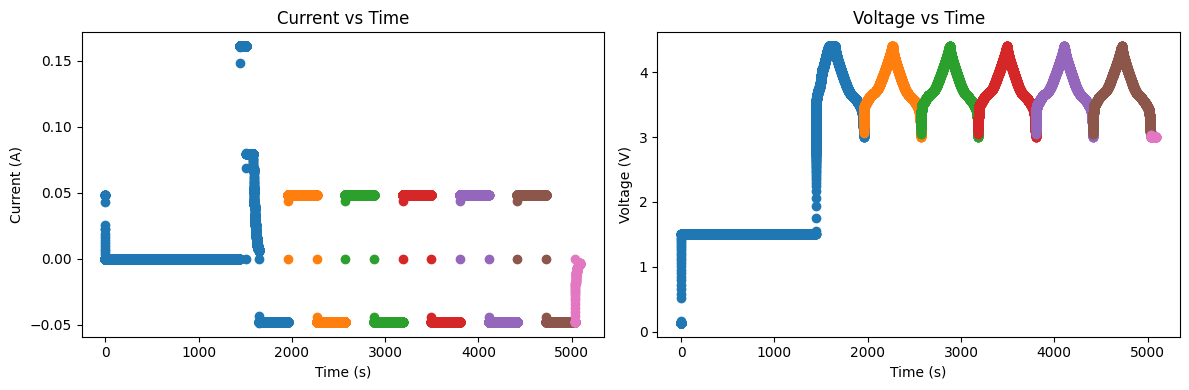

In [7]:
cycles = [0,1,2,3,4,5,6]
currents = []
voltages = []
times = []
charge_capacities = []
discharge_capacities = []
for cycle in cycles:
    demo_cycle_data = cycle_data[cycle]
    print(demo_cycle_data['cycle_number'])
    demo_cycle_data.keys()
    current_data = demo_cycle_data['current_in_A']
    voltage_data = demo_cycle_data['voltage_in_V']
    time_data = demo_cycle_data['time_in_s']
    print(len(demo_cycle_data['charge_capacity_in_Ah']))
    print(len(time_data))
    currents.append(current_data)
    voltages.append(voltage_data)
    times.append(time_data)
    print(time_data)
    charge_capacities.append(demo_cycle_data['charge_capacity_in_Ah'])
    discharge_capacities.append(demo_cycle_data['discharge_capacity_in_Ah'])

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
for i, cycle in enumerate(cycles):
    current_data = np.array(currents[i])
    time_data = np.array(times[i])
    charge_capacity = charge_capacities[i]
    # time_data = time_data[current_data<-0.0048]
    # current_data = current_data[current_data<-0.0048]
    # print(len(current_data))
    plt.scatter(time_data, current_data, label=f'cycle {cycle}')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Current vs Time')
plt.subplot(1,2,2)
for i, cycle in enumerate(cycles):
    voltage_data = voltages[i]
    time_data = times[i]
    discharge_capacity = discharge_capacities[i]
    plt.scatter(time_data, voltage_data, label=f'cycle {cycle}')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time')
plt.tight_layout()
plt.show()

## Split the dataset according to the formation protocol

In [8]:
stanford_formation_parameter_path = 'Prompts/Stanford_formation_parameters.csv'
remaining_seq_num = [i.split('-')[-1] for i in remaining_Stanford_files]
# remaining_seq_num = [i.split('_')[-1] for i in remaining_seq_num]
formation_parameter_column_name = ['formation_temperature', 'ocv_time', 'formation_charge_current_1', 'formation_cutoff_voltage_1', 'formation_charge_current_2', 'formation_verification_repeat']
df = pd.read_csv(stanford_formation_parameter_path)
df

,formation_file_name,seq_num,formation_drying_date,formation_temperature,cell_id,electrolyte,ocv_time,cell_mass_before,cell_mass_after,electrolyte_mass,...,charge_hold_time,formation_discharge_current,formation_verification_current,formation_verification_repeat,regular_project_name,regular_charge_current,regular_charge_cutoff_voltage,regular_discharge_current,regular_discharge_cutoff_voltage,date
0,Nova_Formation,100,100C14h,25,S20A300A0308,EP1,72,4.606,5.641,1.035,...,1,0.048,0.048,0,Nova_Regular,0.24,4.4,0.18,3,9/20/22
1,Nova_Formation,101,100C14h,25,S20A300A0723,EP1,72,4.595,5.648,1.053,...,1,0.048,0.048,0,Nova_Regular,0.24,4.4,0.18,3,9/20/22
2,Nova_Formation,102,100C14h,25,S20A300A0283,EP1,72,4.609,5.693,1.084,...,1,0.048,0.048,0,Nova_Regular,0.24,4.4,0.18,3,9/20/22
3,Nova_Formation,103,100C14h,25,S20A300A0315,EP1,72,4.646,5.683,1.037,...,1,0.048,0.048,0,Nova_Regular,0.24,4.4,0.18,3,9/20/22
4,Nova_Formation,104,100C14h,25,S20A300A0388,EP1,72,4.599,5.641,1.042,...,1,0.048,0.048,0,Nova_Regular,0.24,4.4,0.18,3,9/20/22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Nova_Formation,322,100C14h on 0424,45,S20A300A0578,EP1,0,NaN,NaN,NaN,...,1,0.048,0.048,1,Nova_Regular,0.24,4.4,0.18,3,NaN
179,Nova_Formation,323,100C14h on 0424,45,S20A300A0054,EP1,0,NaN,NaN,NaN,...,1,0.048,0.048,1,Nova_Regular,0.24,4.4,0.18,3,NaN
180,Nova_Formation,324,100C14h on 1117,40,S20A300A0364,EP1,0,4.652,5.614,0.962,...,1,0.048,0.048,0,Nova_Regular,0.24,4.4,0.18,3,NaN
181,Nova_Formation,325,100C14h on 1117,40,S20A300A0423,EP1,0,4.605,5.595,0.990,...,1,0.048,0.048,0,Nova_Regular,0.24,4.4,0.18,3,NaN


In [9]:
n_verification = []
formation_battery = {}
for seq_num in remaining_seq_num:
    seq_num = seq_num.split('_')[-1]
    tmp_df = df.loc[df['seq_num']==int(seq_num)]
    n_verification.append(int(tmp_df['formation_verification_repeat'].values[0]))
    formation_key = tmp_df[formation_parameter_column_name].to_csv(index=False, header=False).strip()
    formation_key = '-'.join(formation_key.split(',')) # convert to one line string
    if int(seq_num)>=288 and int(seq_num)<=323:
        formation_key += '-fast'
    formation_battery[formation_key] = formation_battery.get(formation_key, []) + [int(seq_num)]
print(f'The ditinct formation protocols are: {len(formation_battery)}')
print(max(n_verification))
used_seq_num = [i.split('-')[-1] for i in used_Stanford_files]
used_formation_battery = {}
for seq_num in used_seq_num:
    seq_num = seq_num.split('_')[-1]
    tmp_df = df.loc[df['seq_num']==int(seq_num)]
    n_verification.append(int(tmp_df['formation_verification_repeat'].values[0]))
    formation_key = tmp_df[formation_parameter_column_name].to_csv(index=False, header=False).strip()
    formation_key = '-'.join(formation_key.split(',')) # convert to one line string
    if int(seq_num)>=288 and int(seq_num)<=323:
        formation_key += '-fast'
    formation_battery[formation_key] = formation_battery.get(formation_key, []) + [int(seq_num)]
    used_formation_battery[formation_key] = used_formation_battery.get(formation_key, []) + [int(seq_num)]
print(f'The ditinct formation protocols are: {len(formation_battery)}')
print(f'The ditinct used formation protocols are: {len(used_formation_battery)}')

The ditinct formation protocols are: 57
5
The ditinct formation protocols are: 63
The ditinct used formation protocols are: 15


In [10]:
test_ratio = 0.2
val_ratio = 0.2
train_ratio = 1 - test_ratio - val_ratio

total_protocols = list(formation_battery.keys())
used_protocols = list(used_formation_battery.keys())


required_training_protocols_num = int(len(total_protocols)*train_ratio) - len(used_formation_battery) # The protocols used in the pretraining are always used as training data

training_formation_protocols = np.random.choice(list(set(total_protocols)-set(used_protocols)), size=required_training_protocols_num, replace=False)
training_formation_protocols = list(training_formation_protocols) + list(used_protocols)
print(len(training_formation_protocols), len(total_protocols))
print(len(set(training_formation_protocols)))
validation_formation_protocols = np.random.choice(list(set(total_protocols)-set(training_formation_protocols)), size=int(len(total_protocols)*val_ratio), replace=False)
print(len(validation_formation_protocols))
test_formation_protocols = list(set(total_protocols)-set(training_formation_protocols)-set(validation_formation_protocols))

print(f'Training protocols: {len(training_formation_protocols)}')
print(f'Validation protocols: {len(validation_formation_protocols)}')
print(f'Test protocols: {len(test_formation_protocols)}')

37 63
37
12
Training protocols: 37
Validation protocols: 12
Test protocols: 14


In [11]:
training_seq_nums = []
for protocol in training_formation_protocols:
    training_seq_nums += formation_battery[protocol]
validation_seq_nums = []
for protocol in validation_formation_protocols:
    validation_seq_nums += formation_battery[protocol]
test_seq_nums = []
for protocol in test_formation_protocols:
    test_seq_nums += formation_battery[protocol]

train_files = [f'Stanford_Nova_Regular_{seq_num}.pkl' for seq_num in training_seq_nums]
# train_files += [i+'.pkl' for i in used_Stanford_files] # the Stanford cells used in the pretraining of PBT are always included in the training set
val_files = [f'Stanford_Nova_Regular_{seq_num}.pkl' for seq_num in validation_seq_nums]
test_files = [f'Stanford_Nova_Regular_{seq_num}.pkl' for seq_num in test_seq_nums]
print(f'Training files: {len(train_files)}', train_files)
print(f'Validation files: {len(val_files)}', val_files)
print(f'Test files: {len(test_files)}', test_files)

Training files: 108 ['Stanford_Nova_Regular_121.pkl', 'Stanford_Nova_Regular_122.pkl', 'Stanford_Nova_Regular_123.pkl', 'Stanford_Nova_Regular_157.pkl', 'Stanford_Nova_Regular_158.pkl', 'Stanford_Nova_Regular_159.pkl', 'Stanford_Nova_Regular_175.pkl', 'Stanford_Nova_Regular_176.pkl', 'Stanford_Nova_Regular_177.pkl', 'Stanford_Nova_Regular_285.pkl', 'Stanford_Nova_Regular_286.pkl', 'Stanford_Nova_Regular_287.pkl', 'Stanford_Nova_Regular_160.pkl', 'Stanford_Nova_Regular_161.pkl', 'Stanford_Nova_Regular_162.pkl', 'Stanford_Nova_Regular_115.pkl', 'Stanford_Nova_Regular_116.pkl', 'Stanford_Nova_Regular_117.pkl', 'Stanford_Nova_Regular_112.pkl', 'Stanford_Nova_Regular_113.pkl', 'Stanford_Nova_Regular_114.pkl', 'Stanford_Nova_Regular_315.pkl', 'Stanford_Nova_Regular_316.pkl', 'Stanford_Nova_Regular_317.pkl', 'Stanford_Nova_Regular_279.pkl', 'Stanford_Nova_Regular_280.pkl', 'Stanford_Nova_Regular_281.pkl', 'Stanford_Nova_Regular_276.pkl', 'Stanford_Nova_Regular_277.pkl', 'Stanford_Nova_Regular